In [2]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# Create the Dataset

np.random.seed(42)  #random number won't be generate

# create a dataset

data={
    'product_id' : range(1,21),
    'product_name' : [f'product{i}' for i in range(1,21)],
    'category' : np.random.choice(['Electronic','clothing','Home','Sports',],20),
    'units_sold' : np.random.poisson(lam=20, size=20,),
    'Sales_date' : pd.date_range (start='2023-01-01', periods=20, freq='D')
}

sales_data=pd.DataFrame(data)

#display the dataset

print('sales_data:')
print(sales_data)

sales_data:
    product_id product_name    category  units_sold Sales_date
0            1     product1        Home          25 2023-01-01
1            2     product2      Sports          15 2023-01-02
2            3     product3  Electronic          17 2023-01-03
3            4     product4        Home          19 2023-01-04
4            5     product5        Home          21 2023-01-05
5            6     product6      Sports          17 2023-01-06
6            7     product7  Electronic          19 2023-01-07
7            8     product8  Electronic          16 2023-01-08
8            9     product9        Home          21 2023-01-09
9           10    product10    clothing          21 2023-01-10
10          11    product11        Home          17 2023-01-11
11          12    product12        Home          22 2023-01-12
12          13    product13        Home          14 2023-01-13
13          14    product14        Home          17 2023-01-14
14          15    product15      Sports    

In [5]:
#Save the dataframe to csv file

sales_data.to_csv('sales_data.csv', index=False)


In [6]:
import os
os.getcwd()


'c:\\Users\\dolas\\OneDrive\\statistics'

In [7]:
# Descriptive stats
 
descriptive_stats = sales_data['units_sold'].describe()

print("\nDescriptive statistics for  units sold:")
print(descriptive_stats)

mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
variance_sales = sales_data['units_sold'].var()
std_deviation_sales = sales_data['units_sold'].std()

category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()

#display result

print('\n statistical Analysis:')
print(f"Mean units sold:{mean_sales}")
print(f"Median units sold: {median_sales}")
print(f"Mode units sold:{mode_sales}")
print(f"variance units sold: {variance_sales}")
print(f"standard deviation units sold: {std_deviation_sales}")
print("\ncategory statistics")
print(category_stats)


Descriptive statistics for  units sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

 statistical Analysis:
Mean units sold:18.8
Median units sold: 18.5
Mode units sold:17
variance units sold: 10.90526315789474
standard deviation units sold: 3.3023117899275864

category statistics
     category  sum       mean       std
0  Electronic   73  18.250000  2.217356
1        Home  181  20.111111  3.723051
2      Sports  101  16.833333  2.714160
3    clothing   21  21.000000       NaN


In [8]:
# Inferential statistics

confidence_level = 0.95

degrees_freedom = len(sales_data['units_sold'])-1
sample_mean= mean_sales
sample_standard_error=std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

#t_score 
t_score = stats.t.ppf((1+confidence_level)/2, degrees_freedom)
margin_of_error = t_score*sample_standard_error
confidence_interval=(sample_mean-margin_of_error, sample_mean+margin_of_error)
print("\n confidence interval for mean of units sold")
print(confidence_interval)
      



 confidence interval for mean of units sold
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [9]:
t_statistic, p_value = stats.ttest_1samp(sales_data['units_sold'],20)

print("\n Hypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

if p_value<0.05:
    print("Reject the null hypothesis: The mean units sold is different from 20")
else:
    print('fail to reject the null hypothesis: the mean units is not different from 20')


 Hypothesis Testing (t-test):
T-statistic: -1.6250928099424466, p-value: 0.12061572226781002
fail to reject the null hypothesis: the mean units is not different from 20


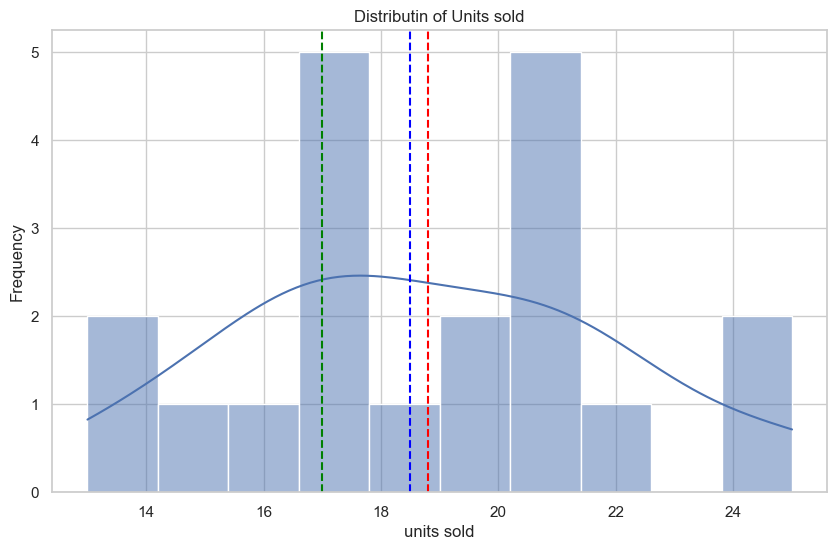

In [10]:
# Visualization

sns.set(style='whitegrid')

#plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'], bins=10, kde=True)
plt.title('Distributin of Units sold')
plt.xlabel('units sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,color='red', linestyle='--', label ='Mean')
plt.axvline(median_sales,color='blue',linestyle='--', label='Median')
plt.axvline(mode_sales,color='green', linestyle='--', label='Mode')
plt.legend
plt.show()

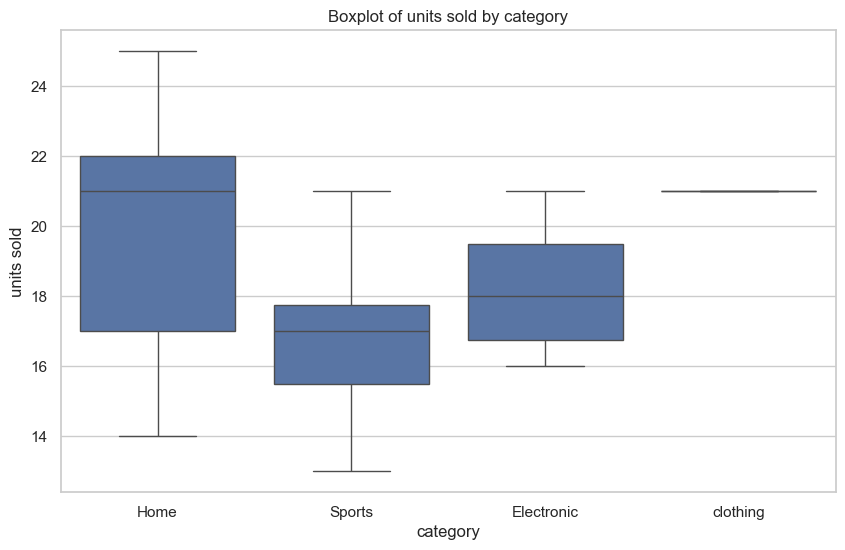

In [11]:
# Boxplot for units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y= 'units_sold', data=sales_data)
plt.title('Boxplot of units sold by category')
plt.xlabel('category')
plt.ylabel('units sold')
plt.show()

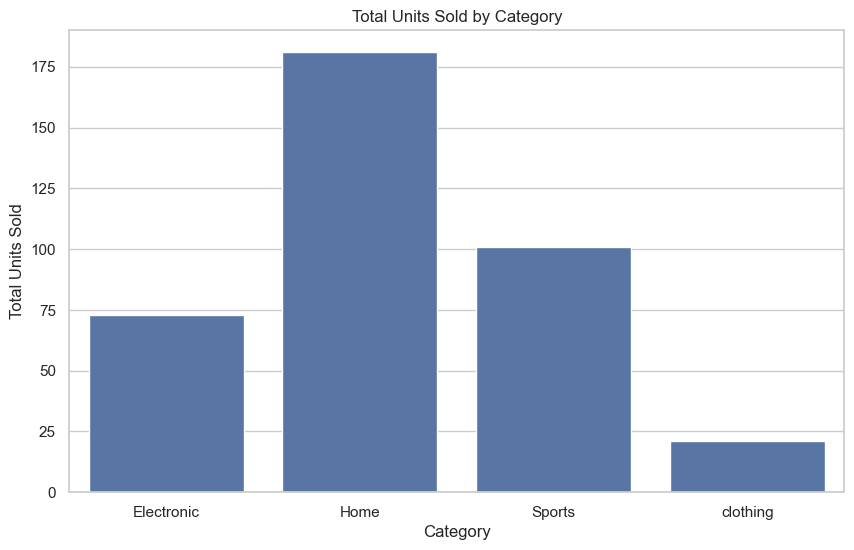

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='sum', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
